In [131]:
# Importing all the required libraries

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Data Collection

In [132]:
path = 'https://raw.githubusercontent.com/MuskanKhandelia/Iphone_Purchase_Prediction/main/iphone_purchase_records.csv'
data = pd.read_csv(path)
original_data = data.copy()
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


## Data Preparation

### Data Cleaning

In [133]:
data.shape

(400, 4)

This means that this dataset has 400 rows and 4 columns.

In [134]:
data[data.duplicated()]

,Gender,Age,Salary,Purchase Iphone
74,Male,32,18000,0
94,Female,29,83000,0
186,Female,20,82000,0
192,Male,29,43000,0
231,Male,39,42000,0
236,Male,40,57000,0
256,Female,41,72000,0
257,Male,40,57000,0
312,Female,38,50000,0
322,Male,41,52000,0


There are many duplicate records in the dataset. Need to remove them.

In [135]:
data.drop_duplicates(inplace = True)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           380 non-null    object
 1   Age              380 non-null    int64 
 2   Salary           380 non-null    int64 
 3   Purchase Iphone  380 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.8+ KB


There are no null values in the dataset.

In [137]:
data.describe()

,Age,Salary,Purchase Iphone
count,380.000000,380.000000,380.000000
mean,37.586842,70421.052632,0.368421
std,10.592492,34604.155483,0.483012
min,18.000000,15000.000000,0.000000
25%,29.000000,43000.000000,0.000000
50%,37.000000,70500.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Data Analysis and Visualization

In [138]:
data.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

<Axes: >

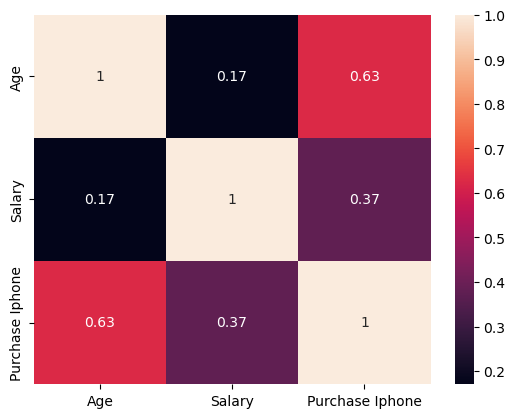

In [139]:
corr = data[['Age', 'Salary', 'Purchase Iphone']].corr()
sns.heatmap(data = corr, annot = True)

'Age' has a good correlation with the target variable 'Purchase Iphone' as compared to 'Salary' which has very poor correlation.

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


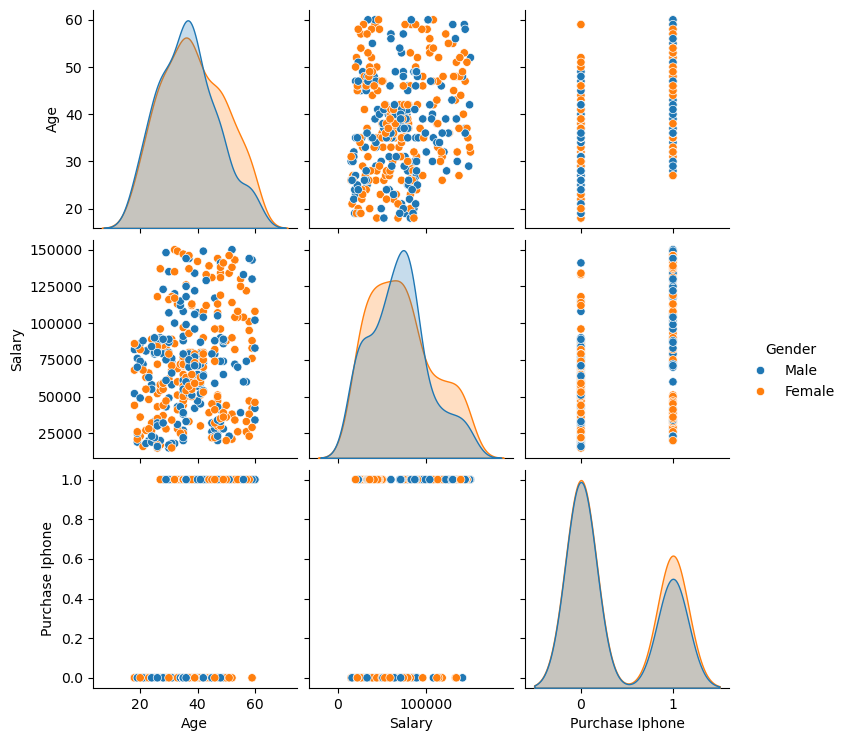

In [140]:
sns.pairplot(data = data, hue = 'Gender')

<Axes: xlabel='Gender', ylabel='Purchase Iphone'>

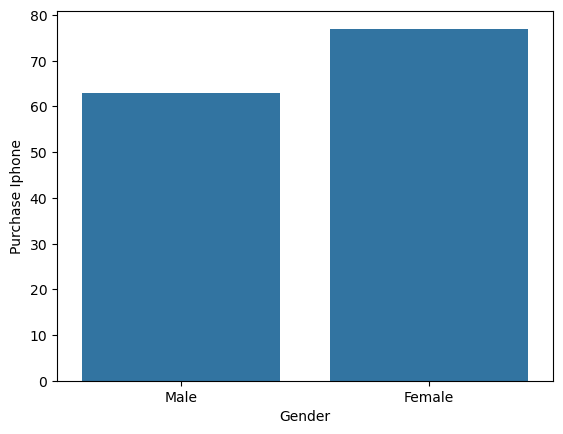

In [141]:
sns.barplot(data = data, x = 'Gender', y = 'Purchase Iphone', estimator = 'sum', errorbar = None)

Females bought more iPhones than males. 

<Axes: xlabel='Age', ylabel='Count'>

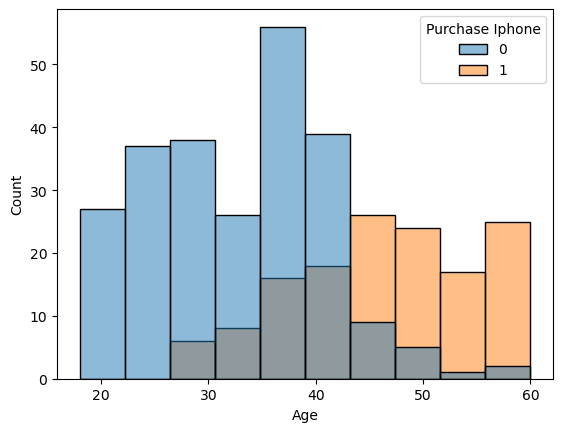

In [142]:
sns.histplot(data = data, x = 'Age', hue = 'Purchase Iphone')

Elderly individuals usually buy more iPhones than younger people.

<Axes: xlabel='Salary', ylabel='Count'>

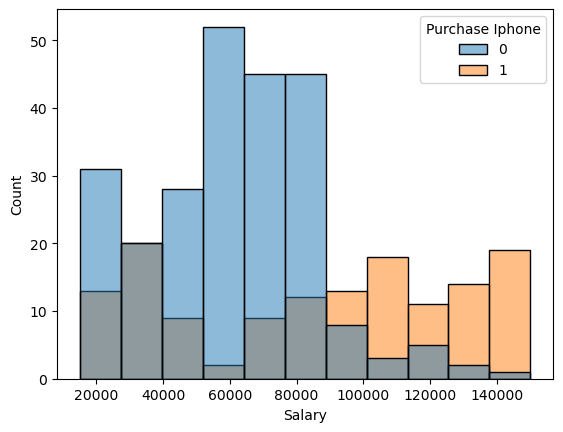

In [143]:
sns.histplot(data = data, x = 'Salary', hue = 'Purchase Iphone')

Individuals with salaries ranging from 20-30k and earning more over 1 lakh purchase the majority of iPhones.

### Feature Engineering

In [144]:
Gender_num = pd.get_dummies(data['Gender'], dtype = 'int')
data = pd.concat([data,Gender_num], axis = 1).drop('Gender', axis = 1)

data.head()

,Age,Salary,Purchase Iphone,Female,Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


We utilized One Hot Encoding to transform categorical input to numerical values.

## Model Selection - K Nearest Neighbour 

## Model building and Training

In [145]:
X = data[['Age', 'Salary', 'Female', 'Male']]
y = data['Purchase Iphone']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.75, random_state = 1234)

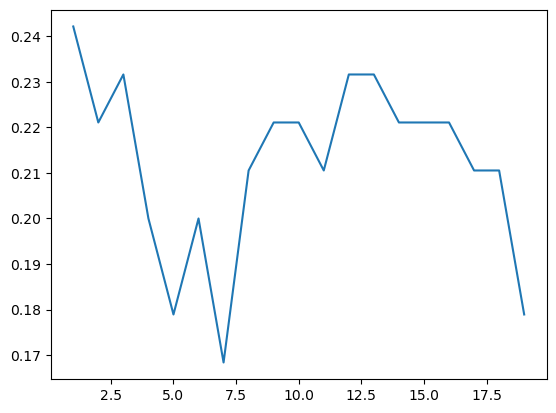

In [146]:
# Error method/Elbow method to choose the value of K

error = []

for i in range(1,20):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    error.append(1 - accuracy_score(y_test,y_pred))
    
sns.lineplot(x = range(1,20), y = error)

k = error.index(min(error)) + 1

The smallest error value is observed for k = 7. Thus, k = 7 is considered in the model.

In [147]:
clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

## Model Evaluation

The accuracy score is 0.83.


<Axes: >

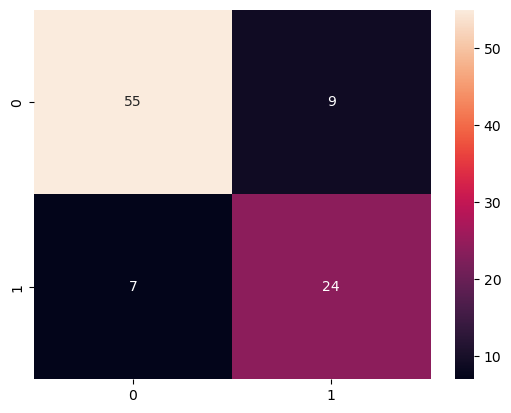

In [148]:
y_pred = clf.predict(X_test)

print(f'The accuracy score is {round(accuracy_score(y_test,y_pred),2)}.')
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

Out of 95 predictions, 16 predictions were wrong and 79 were correct.